Deep Learning การเรียนรู้เชิงลึก 
Artificial Intelligence (ANN) โครงข่ายประสาทเทียม 

In [209]:
#การนำ library ที่สำคัญๆ มาใช้งาน

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [210]:
#การเรียกข้อมูลเข้ามาใช้งาน แล้วนำไปเก็บไว้ในตัวแปร df 

df = pd.read_csv('heart.csv')
df 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [211]:
# คำสั่งรันเพื่อดูค่าเฉลี่ย (mean) ค่าเบี่ยงเบนมาตรฐาน (std) ค่าสูงสุด (max) และค่าต่ำสุด (min)

df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [212]:
#คำสั่งรันเพื่อตรวจดูความสมบูรณ์ของข้อมูล (missing) ถ้าค่าเป็น 0 = ข้อมูลสมบูรณ์ ไม่มีค่า missing แต่ถ้าเป็นตัวเลข เช่น 12 แสดงว่าข้อมูลมีค่า missing คือมีข้อมูลที่ไม่สมบูรณ์อยู่ 12 ที่ เป็นต้น

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [213]:
#คำสั่งใช้ดูคอลัมน์ว่ามีกี่คอลัมน์ เป็นต้น ในที่นี่มี 14 คอลัมน์

df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [214]:
# คำสั่งใช้ดูข้อมูล ว่าข้อมูลเป็นลักษณะใด เช่น int64 = ข้อมูลเป็นเลขจำนวนเต็ม, float64 = ข้อมูลเป็นเลขทศนิยม, และ object = ข้อมูลเป็นต้วอักษรหรือ string 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


อธิบายความหมาย 

X = df.iloc[:, : -1] คำสั่งใช้แบ่งข้อมูล (สาเหตุ/features/attributes คือคุณสมบัติ คุณลักษณะ) ไปใว้ในตัวแปร X สัญลักษณ์ :, หมายถึง เลือกทั้งหมดทุกแถว และ : -1 หมายถึง เลือกคอลัมน์ทั้งหมด ยกเว้นคอลัมน์สุดท้าย คือ target ไม่เอาเข้ามา 
ข้อสังเกต 
X = df.iloc[:, 5: -1] หมายความว่า เครื่องหมาย :, คือเลือกทั้งหมดทุกแถว ส่วน 5: -1 หมายความว่า ให้เลือกคอลัมน์ตั้งแต่คอลัมน์ที่ 5 เป็นต้นไป ยกเว้นคอลัมน์สุดท้าย 
X = df.iloc[:, -5: -1] หมายความว่า เครื่องหมาย :, คือเลือกทั้งหมดทุกแถว ส่วน -5: -1 หมายความว่า ให้เลือกโดยการนับจากคอลัมน์สุดท้ายขึ้นมา คือนับจากหลังมาหน้า (-5, -4, -3, -2, -1) ถ้านับคอลัมน์จากหน้าไปหลัง ให้เริ่มนับที่ 0 ถ้านับคอลัมน์จากหลังไปหน้าให้เริ่มที่ 1

y = df.iloc[:, -1] คำสั่งใช้แบ่งข้อมูล (ผล/class/label/output คือแสดงผล) ไปใว้ในตัวแปร y สัญลักษณ์ : หมายถึง เลือกทั้งหมดทุกแถว และ -1 หมายถึง เลือกคอลัมน์สุดท้ายเข้ามาตัวเดียว ส่วนคอลัมน์อื่นๆ ไม่นำเข้ามา ข้อสังเกต y = df.iloc[:, -1] หลัง , ไม่มี : ก่อน -1 

In [215]:
X = df.iloc[:, : -1]
y = df.iloc[:, -1]

X,y

(      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0      52    1   0       125   212    0        1      168      0      1.0   
 1      53    1   0       140   203    1        0      155      1      3.1   
 2      70    1   0       145   174    0        1      125      1      2.6   
 3      61    1   0       148   203    0        1      161      0      0.0   
 4      62    0   0       138   294    1        1      106      0      1.9   
 ...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 1020   59    1   1       140   221    0        1      164      1      0.0   
 1021   60    1   0       125   258    0        0      141      1      2.8   
 1022   47    1   0       110   275    0        0      118      1      1.0   
 1023   50    0   0       110   254    0        0      159      0      0.0   
 1024   54    1   0       120   188    0        1      113      0      1.4   
 
       slope  ca  thal  
 0         2   2     3  
 1         0

StandardScaler คือการแปลงสเกลข้อมูล Features (คุณสมบัติ) ที่มีหน่วยวัดแตกต่างกัน ให้มีสเกลหน่วยวัดเหมือนกัน เช่น บางข้อมูลมีหน่วยวัดเป็น กิโลเมตร เมตร เซนติเมตร หรือบาท เป็นต้น ดังนั้นการกำหนดสเกลให้เหมือนกัน โดยการปรับให้ค่าเฉลี่ย (Mean) เท่ากับ 0 และค่าเบี่ยงแบนมาตรฐาน (Standard Deviation: SD) เท่ากับ 1 ตาม coding ดังต่อไปนี้

In [216]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

การแบ่งข้อมูลเพื่อใช้ในการฝึกสอนและทดสอบ
-test_size=0.3 เป็นการแบ่งข้อมูลใช้ในการทดอสบ 30% (X_test, y_test) ส่วนที่เหลือ 70% ใช้ในการฝึกสอน (X_train, y_train)
-shuffle=True เป็น coding ใช้ในการสุ่มแบ่งข้อมูลเพื่อใช้ในการฝึกสอนและทดสอบ ทำหน้าที่เหมือน random_state=1 หรือจะใช้ random_state=1 แทนก็ได้

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, 
                                   test_size=0.3, shuffle=True) #random_state=1)

In [218]:
print(f'จำนวน 717 แถว และ 13 คอลัมน์ {X_train.shape} #input_shape=(13,)', 
      f'จำนวน 308 แถว และ 13 คอลัมน์ {X_test.shape}', 
      f'จำนวน 717 แถว และ 1 คอลัมน์ {y_train.shape}', 
      f'จำนวน 308 แถว และ 1 คอลัมน์ {y_test.shape}',
      sep='\n')

จำนวน 717 แถว และ 13 คอลัมน์ (717, 13) #input_shape=(13,)
จำนวน 308 แถว และ 13 คอลัมน์ (308, 13)
จำนวน 717 แถว และ 1 คอลัมน์ (717,)
จำนวน 308 แถว และ 1 คอลัมน์ (308,)


In [219]:
X_train, X_test, y_train, y_test

(array([[ 0.61379988,  0.66150409, -0.91575542, ...,  0.99543334,
          1.20922066,  1.08985168],
        [-0.93011394, -1.51170646,  0.05593123, ...,  0.99543334,
         -0.73197147, -0.52212231],
        [ 0.39324077, -1.51170646, -0.91575542, ..., -0.6241209 ,
         -0.73197147, -0.52212231],
        ...,
        [-1.04039349, -1.51170646, -0.91575542, ..., -0.6241209 ,
         -0.73197147, -0.52212231],
        [-1.26095261, -1.51170646, -0.91575542, ..., -0.6241209 ,
         -0.73197147,  1.08985168],
        [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
          0.23862459,  1.08985168]]),
 array([[ 1.16519768,  0.66150409,  1.99930453, ..., -0.6241209 ,
          0.23862459, -0.52212231],
        [-1.26095261,  0.66150409, -0.91575542, ..., -0.6241209 ,
         -0.73197147,  1.08985168],
        [ 0.72407944, -1.51170646, -0.91575542, ...,  0.99543334,
         -0.73197147, -0.52212231],
        ...,
        [ 1.82687503, -1.51170646, -0.91575542, ..., -

In [220]:
#one-hot-encoding การแปลง class/label ให้เป็นเลขฐาน 2 คือ 0 และ 1 อีกวิธีหนึ่ง 

import tensorflow as tf 
to_categorical = tf.keras.utils.to_categorical
from keras.utils import  to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape 

((717, 2), (308, 2))

In [221]:
y_train, y_test

(array([[1., 0.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [1., 0.],
        [1., 0.]], dtype=float32),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.]

In [222]:
import tensorflow as tf 
import keras

from keras.layers import Dense, Dropout

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [223]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                896       
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3,042
Trainable params: 3,042
Non-trainable params: 0
_________________________________________________________________


In [224]:
# opt = tf.keras.optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', 
              optimizer='SGD', metrics=['accuracy'])

In [225]:
history = model.fit(X_train, y_train, 
                    epochs=50, batch_size=5, 
                    verbose=1, validation_data=(X_test,y_test),
                    shuffle=True) #, validation_split=0.25)

Epoch 1/50
144/144 [==============================] - 2s 6ms/step - loss: 0.6405 - accuracy: 0.6430 - val_loss: 0.5075 - val_accuracy: 0.8052
Epoch 2/50
144/144 [==============================] - 1s 4ms/step - loss: 0.4823 - accuracy: 0.7810 - val_loss: 0.4040 - val_accuracy: 0.8279
Epoch 3/50
144/144 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8173 - val_loss: 0.3518 - val_accuracy: 0.8604
Epoch 4/50
144/144 [==============================] - 0s 3ms/step - loss: 0.3989 - accuracy: 0.8006 - val_loss: 0.3257 - val_accuracy: 0.8669
Epoch 5/50
144/144 [==============================] - 0s 3ms/step - loss: 0.3828 - accuracy: 0.8466 - val_loss: 0.3148 - val_accuracy: 0.8734
Epoch 6/50
144/144 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.8591 - val_loss: 0.3026 - val_accuracy: 0.8799
Epoch 7/50
144/144 [==============================] - 0s 3ms/step - loss: 0.3557 - accuracy: 0.8354 - val_loss: 0.2971 - val_accuracy: 0.8831
Epoch 

In [145]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss =', score[0])
print('Test accuracy =', score[1])

Test loss = 0.1524004489183426
Test accuracy = 0.948051929473877


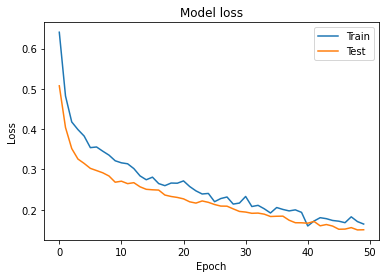

In [226]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

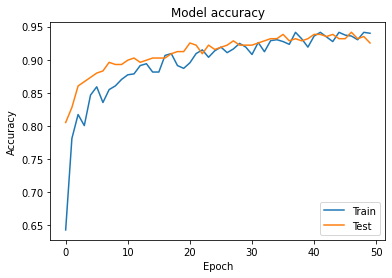

In [227]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

การบันทึกโมเดลไปพัฒนาบนระบบดิจิทัล

In [228]:
model.save('bc_model.h5')
model.save('bc_model')

INFO:tensorflow:Assets written to: bc_model\assets


การพยากรณ์โมเดล

In [229]:
y_pred = model.predict(X_test)

#threshold = 0.5
ypred = (y_pred > 0.5).astype(int)
predicted = pd.DataFrame(ypred)

10/10 [==============================] - 0s 2ms/step


In [230]:
y_pred, predicted 

(array([[6.72992766e-01, 3.95278096e-01],
        [9.11986172e-01, 6.85810205e-03],
        [3.40695918e-01, 6.37638330e-01],
        [9.34614599e-01, 2.83672996e-02],
        [7.98412204e-01, 6.98219240e-02],
        [3.68987590e-01, 6.10094547e-01],
        [9.71264601e-01, 1.33565934e-02],
        [9.46713686e-01, 6.60844985e-03],
        [8.78982469e-02, 8.67443323e-01],
        [9.89695072e-01, 5.57251915e-04],
        [3.61203849e-01, 6.13459587e-01],
        [7.55850375e-02, 8.54973078e-01],
        [9.49346602e-01, 5.40536344e-02],
        [9.48426783e-01, 1.76487043e-02],
        [8.64863217e-01, 9.99968313e-03],
        [4.47994769e-02, 9.55832422e-01],
        [5.62662303e-01, 6.36784792e-01],
        [2.18447506e-01, 7.66669750e-01],
        [6.14767134e-01, 2.74961114e-01],
        [2.15388439e-03, 9.49631155e-01],
        [9.73088264e-01, 7.88807310e-03],
        [8.81863236e-02, 8.94511044e-01],
        [6.69926822e-01, 4.39207315e-01],
        [3.27068329e-01, 6.6879105

In [231]:
y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_cat

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [232]:
ds = pd.DataFrame(y_pred_cat)
d = ds.rename(columns={0:'ข้อมูลพยากรณ์'})
d

,ข้อมูลพยากรณ์
0,0
1,0
2,1
3,0
4,0
...,...
303,1
304,0
305,1
306,1


##### class_names[] ใช้กำหนด class ให้กับ y_test ซึ่ง class_names[] เป็นตัวแปรที่ใช้แปลงค่า class ที่เป็นชื่อประเทศ ให้เป็นตัวเลข (0,1,2,3...n) ด้วยฟังก์ชัน pd.factorize() เช่น  y, class_names = pd.factorize(y) ที่ได้แปลงค่าไว้แล้วตั้งแต่แรก
##### np.argmax() ฟังก์ชันใช้ตรวจสอบค่าความเชื่อมั่นว่า class ใดมีค่ามากที่สุด แล้วก็จะเลือก class นั้นมาเพียง class เดียวในแถวนั้น เช่น y_test2 แสดงผลเป็น array([0, 0, 5, ..., 7, 5, 5], dtype=int64)

In [233]:
ytest = pd.DataFrame(y_test)
ytest1 = ytest.rename(columns={0:'ข้อมูลจริง', 1: 'ข้อมูลพยากรณ์'})
ytest1

,ข้อมูลจริง,ข้อมูลพยากรณ์
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
303,0.0,1.0
304,1.0,0.0
305,0.0,1.0
306,0.0,1.0


##### การประเมิน model ด้วย mean_squared_error (MSE: ค่าน้อยที่สุดเข้าใกล้ 0 เป็นค่าที่ดี), mean_absolute_error (MAE: ค่าน้อยที่สุดเข้าใกล้ 0 เป็นค่าที่ดี), root mean_squared_error (RMSE: ค่าน้อยที่สุดเข้าใกล้ 0 เป็นค่าที่ดี), r2_score (R-squred: ค่าเข้าใกล้ 1 เป็นค่าที่ดี)

In [234]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('% of accuracy:ค่าร้อยละของความแม่นยำ =', r2_score(y_test, y_pred))
print('MAE:ค่าเฉลี่ยความคลาดเคลื่อนสัมบูรณ์ =',mean_absolute_error(y_test, y_pred))
print('MSE:ค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง =', mean_squared_error(y_test, y_pred)) 
print('RSME:รากที่สองของค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง =', np.sqrt(mean_squared_error(y_test, y_pred)))

% of accuracy:ค่าร้อยละของความแม่นยำ = 0.758110587640396
MAE:ค่าเฉลี่ยความคลาดเคลื่อนสัมบูรณ์ = 0.17203215
MSE:ค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง = 0.06004142
RSME:รากที่สองของค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง = 0.2450335


##### การโหลด model มาใช้งาน

In [163]:
#my_model.get_config()
model.save('bc_model.h5')
from tensorflow.keras.models import load_model
my_model = load_model('bc_model.h5')

my_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                896       
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3,042
Trainable params: 3,042
Non-trainable params: 0
_________________________________________________________________


In [164]:
new_model = load_model('bc_model')

new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                896       
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3,042
Trainable params: 3,042
Non-trainable params: 0
_________________________________________________________________


##### การนำโมเดลที่บันทึกไว้มา train ใหม่อีกครั้ง 

In [165]:
history = new_model.fit(X_train, y_train, 
                    epochs=50, batch_size=10, 
                    verbose=1, validation_split=0.25,
                    shuffle=True) #validation_data=(X_test,y_test)

Epoch 1/50
54/54 [==============================] - 1s 8ms/step - loss: 0.1479 - accuracy: 0.9423 - val_loss: 0.0924 - val_accuracy: 0.9833
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1357 - accuracy: 0.9497 - val_loss: 0.0940 - val_accuracy: 0.9833
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1422 - accuracy: 0.9441 - val_loss: 0.0951 - val_accuracy: 0.9833
Epoch 4/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1453 - accuracy: 0.9479 - val_loss: 0.0946 - val_accuracy: 0.9833
Epoch 5/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1523 - accuracy: 0.9423 - val_loss: 0.0958 - val_accuracy: 0.9833
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1330 - accuracy: 0.9534 - val_loss: 0.0954 - val_accuracy: 0.9778
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1477 - accuracy: 0.9404 - val_loss: 0.0953 - val_accuracy: 0.9778
Epoch 8/50
54/54 [==